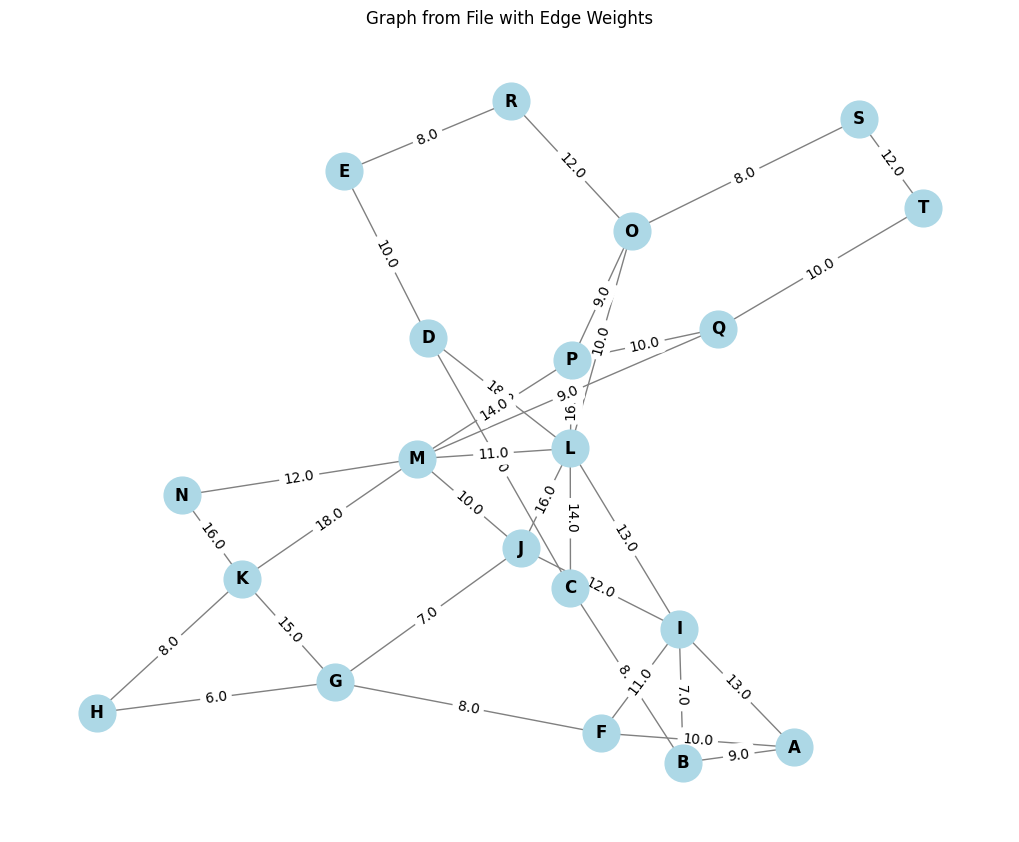

In [1]:
# Exibe o grafo do arquivo graph.txt
from functions import visualizar_grafo
visualizar_grafo("grafo.txt")

In [2]:
from functions import *
np.set_printoptions(threshold=np.inf)

# Utiliza ordem alfabetica para descoberta dos nós
def dijkstra(inicial, final, matriz_adj):
    descobertos = []
    # Conjunto de vertices que não foram explorados
    abertos = []
    distancia = dict()
    pais = dict()

    # Adiciona todos os vertices no conjunto de abertos
    for vertice in range(len(matriz_adj)):
        if conexo_ao_grafo(vertice, matriz_adj):
            abertos.append(vertice)
            distancia[vertice] = np.inf
    if len(matriz_adj) != len(abertos):
        print("O grafo possui vértices desconexos")

    # Descobre o vertice inicial e zera sua distancia
    descobertos.append(inicial)
    distancia[inicial] = 0

    if inicial+1 > len(matriz_adj) or final+1 > len(matriz_adj):
        print("Vertice inicial ou final não existe no grafo")
        return []
    while len(abertos) != 0:
        print("Abertos (v: dist): ", [f"{int_to_letter(i+1)}: {distancia[i]}" for i in distancia if i in abertos])
        v = abertos.pop(obter_indice_de_menor_metrica(abertos, distancia))
        print("Escolhido: ", int_to_letter(v+1))
        # Obtém os vizinhos do vertice v
        vizinhos = [i for i in obter_vizinhos(v, matriz_adj) if i in abertos]
        print("Vizinhos (v: dist):", [f"{int_to_letter(i+1)}: {distancia[v] + matriz_adj[v][i]}" for i in vizinhos], "\n")

        for vizinho in vizinhos:
            # Descobre cada vizinho e os adiciona na fila para serem explorados
            descobertos.append(vizinho)
            # Se a distancia encontrada for menor que a guardada, ele substitui a distância
            if distancia[v] + matriz_adj[v][vizinho] < distancia[vizinho]:
                distancia[vizinho] = distancia[v] + matriz_adj[v][vizinho]
                pais[vizinho] = v
    print(f"Distância da Solução: {distancia[final]}")
    return descobertos, pais

matriz_adj = gerar_matriz_adjacente("grafo.txt")
inicial, final = letter_to_int("G")-1, letter_to_int("S")-1 # Retorna o número correspondente a ordem alfabética

descobertos, pais = dijkstra(inicial, final, matriz_adj)

imprimir_resultado(incrementar(descobertos), usarLetras=True)

Abertos (v: dist):  ['A: inf', 'B: inf', 'C: inf', 'D: inf', 'E: inf', 'F: inf', 'G: 0', 'H: inf', 'I: inf', 'J: inf', 'K: inf', 'L: inf', 'M: inf', 'N: inf', 'O: inf', 'P: inf', 'Q: inf', 'R: inf', 'S: inf', 'T: inf']
Escolhido:  G
Vizinhos (v: dist): ['F: 8.0', 'H: 6.0', 'J: 7.0', 'K: 15.0'] 

Abertos (v: dist):  ['A: inf', 'B: inf', 'C: inf', 'D: inf', 'E: inf', 'F: 8.0', 'H: 6.0', 'I: inf', 'J: 7.0', 'K: 15.0', 'L: inf', 'M: inf', 'N: inf', 'O: inf', 'P: inf', 'Q: inf', 'R: inf', 'S: inf', 'T: inf']
Escolhido:  H
Vizinhos (v: dist): ['K: 14.0'] 

Abertos (v: dist):  ['A: inf', 'B: inf', 'C: inf', 'D: inf', 'E: inf', 'F: 8.0', 'I: inf', 'J: 7.0', 'K: 14.0', 'L: inf', 'M: inf', 'N: inf', 'O: inf', 'P: inf', 'Q: inf', 'R: inf', 'S: inf', 'T: inf']
Escolhido:  J
Vizinhos (v: dist): ['I: 19.0', 'L: 23.0', 'M: 17.0'] 

Abertos (v: dist):  ['A: inf', 'B: inf', 'C: inf', 'D: inf', 'E: inf', 'F: 8.0', 'I: 19.0', 'K: 14.0', 'L: 23.0', 'M: 17.0', 'N: inf', 'O: inf', 'P: inf', 'Q: inf', 'R: in

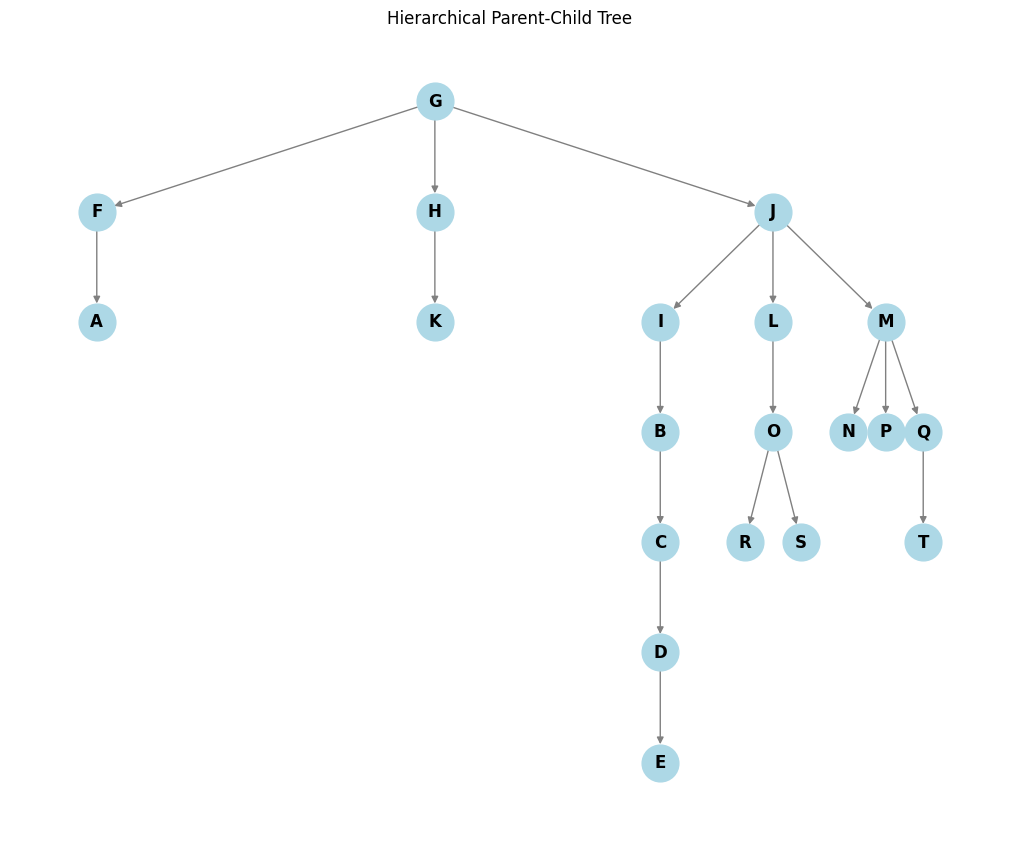

In [3]:
visualizar_arvore_de_pais(incrementar(pais), usarLetras=True)